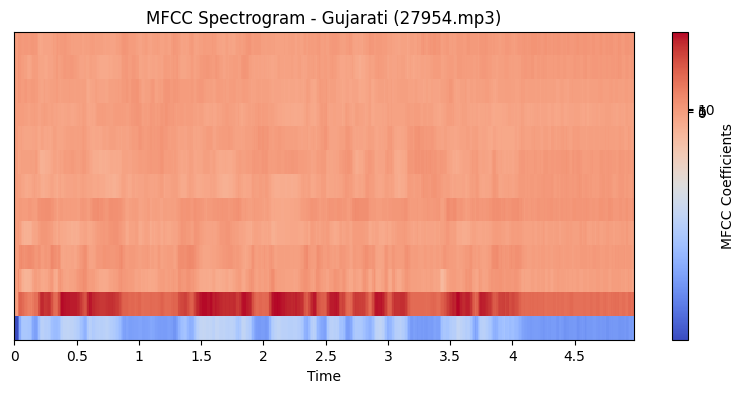

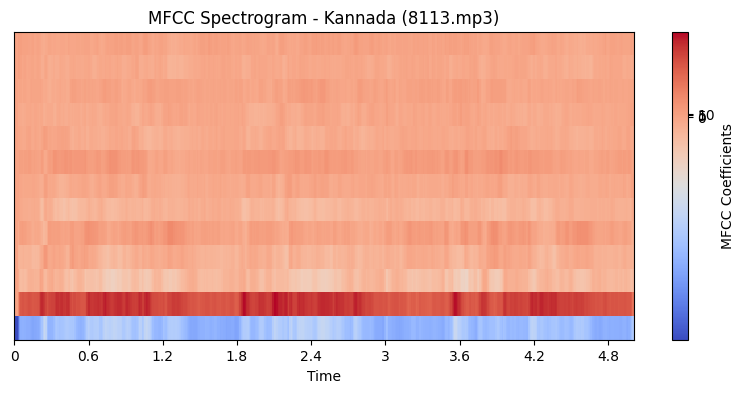

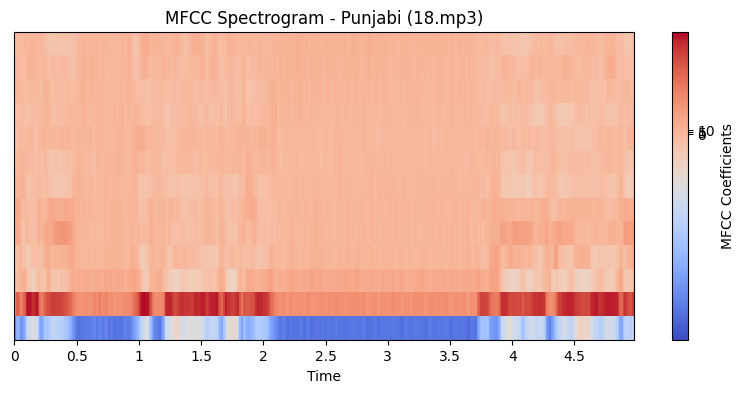

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.38      0.43      2002
           1       0.95      0.97      0.96      1996
           2       0.50      0.61      0.55      2002

    accuracy                           0.65      6000
   macro avg       0.65      0.65      0.65      6000
weighted avg       0.65      0.65      0.65      6000



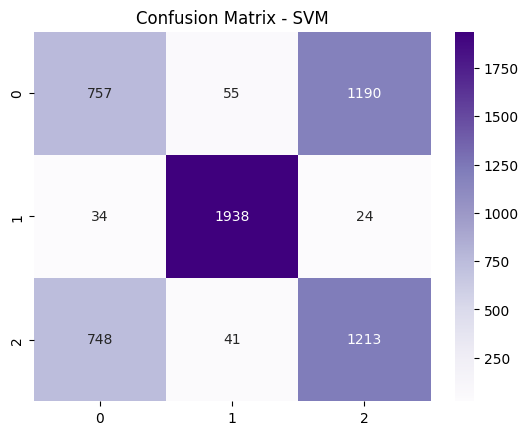

In [12]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

# 1. Load Dataset - Set Audio Dataset
dataset_path = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset"   # Change this to your dataset directory
# Select 3 languages for analysis
languages = ["Gujarati", "Kannada", "Punjabi"]  

# 2. Function to Extract MFCC Features
def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)  # Compute mean MFCC features

# 3. Visualize MFCC for a Random Sample from Each Language
def plot_mfcc_spectrogram(language):
    lang_path = os.path.join(dataset_path, language)
    files = [f for f in os.listdir(lang_path) if f.endswith(".mp3")]
    if not files:
        print(f"No MP3 files found for {language}")
        return
    sample_file = random.choice(files)
    file_path = os.path.join(lang_path, sample_file)
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    #plt.colorbar()
    
    # Customize the color bar
    cbar = plt.colorbar()
    cbar.set_label('MFCC Coefficients')

    # Change the color map
    cbar.set_ticks([0, 5, 10])  # Optionally, we can set custom ticks

    plt.title(f'MFCC Spectrogram - {language} ({sample_file})')
    plt.show()

# Example Usage: plot MFCC for a random sample file from each language
for lang in languages:
    plot_mfcc_spectrogram(lang)
    
# 4. Extract MFCC Features for Classification (Only top <max_files_per_language> files per language)
def prepare_dataset(n_mfcc=13, max_files_per_language=10000):
    X, y = [], []
    for label, lang in enumerate(languages):  # Use only selected languages
        lang_path = os.path.join(dataset_path, lang)
        files = [f for f in os.listdir(lang_path) if f.endswith(".mp3")]
        
        # Limit to top <no. of files given> files
        files = files[:max_files_per_language]  # Only take the first <no. of files given> files
        for file in files:
            file_path = os.path.join(lang_path, file)
            mfcc = extract_mfcc(file_path, n_mfcc)
            X.append(mfcc)
            y.append(label)
    
    return np.array(X), np.array(y)


# Prepare dataset
X, y = prepare_dataset()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Train SVM Model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)


# Evaluate model
y_pred = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - SVM")
plt.show()
